In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import InputLayer,Dense,Dropout,Flatten
import os

In [2]:
final_data= []
count = 0
dicton = {}
for faces in os.listdir(r'images'):
     if faces.endswith(".npy"):
         print(np.load(r'images/{}'.format(faces)).shape,faces)
         final_data.append(np.concatenate([np.load(r'images/{}'.format(faces)),
                                         np.full((np.load(r'images/{}'.format(faces))
                                                         .shape[0],1),count)],axis=1))
         dicton.update({faces:count})
         count+=1

(120, 10000) aravinth1.npy
(739, 10000) BHARGAVI - panchumarthi Bhargavi.npy
(894, 10000) bhargavimuramkar - Bhargavi Muramkar.npy
(777, 10000) Deepthi - Chittiprolu Venkata Deepthi.npy
(228, 10000) JayaKumar.npy
(112, 10000) karthik.npy
(40, 10000) Maheswari - Mahiaraveeti123.npy
(700, 10000) Manoj - MANOJ KUMAR MAHARANA.npy
(963, 10000) meghana - dimpy rampally.npy
(145, 10000) naga.npy
(700, 10000) Narasimha2 - Narasimharao.npy
(167, 10000) palak.npy
(600, 10000) Pavani1 - Pavani Pasula.npy
(64, 10000) Pranav - Pranav Bhawsar.npy
(954, 10000) raviteja - RAVI TEJA MADDELA.npy
(171, 10000) raviteja.npy
(534, 10000) Renuka - Renuka sri Annem.npy
(76, 10000) shaheer.npy
(268, 10000) swetha.npy


In [3]:
final_data[0].shape

(120, 10001)

In [4]:
array =np.concatenate(final_data)

In [5]:
array

array([[167, 168, 171, ..., 105, 109,   0],
       [105, 102, 103, ..., 174, 168,   0],
       [122, 124, 124, ..., 172, 167,   0],
       ...,
       [252, 250, 247, ...,  87,  87,  18],
       [251, 251, 251, ...,  81,  86,  18],
       [ 56,  56,  56, ..., 103, 103,  18]])

In [6]:
print(dicton)

{'aravinth1.npy': 0, 'BHARGAVI - panchumarthi Bhargavi.npy': 1, 'bhargavimuramkar - Bhargavi Muramkar.npy': 2, 'Deepthi - Chittiprolu Venkata Deepthi.npy': 3, 'JayaKumar.npy': 4, 'karthik.npy': 5, 'Maheswari - Mahiaraveeti123.npy': 6, 'Manoj - MANOJ KUMAR MAHARANA.npy': 7, 'meghana - dimpy rampally.npy': 8, 'naga.npy': 9, 'Narasimha2 - Narasimharao.npy': 10, 'palak.npy': 11, 'Pavani1 - Pavani Pasula.npy': 12, 'Pranav - Pranav Bhawsar.npy': 13, 'raviteja - RAVI TEJA MADDELA.npy': 14, 'raviteja.npy': 15, 'Renuka - Renuka sri Annem.npy': 16, 'shaheer.npy': 17, 'swetha.npy': 18}


In [7]:
import pandas as pd
df = pd .DataFrame(array)

In [8]:
df.columns

RangeIndex(start=0, stop=10001, step=1)

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,167,168,171,171,168,166,166,167,165,161,...,169,170,168,113,110,108,103,105,109,0
1,105,102,103,103,107,111,110,105,103,103,...,175,172,174,176,175,175,173,174,168,0
2,122,124,124,125,126,129,133,140,150,151,...,177,174,172,171,172,174,175,172,167,0
3,128,132,135,136,141,152,159,162,161,158,...,175,174,174,177,179,178,177,175,172,0
4,122,125,127,129,131,143,148,153,155,157,...,179,178,178,177,176,174,173,173,169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8247,124,111,103,105,104,109,112,118,125,121,...,99,104,94,79,88,95,98,106,100,18
8248,121,126,107,107,105,106,108,120,120,120,...,92,97,99,94,69,70,71,95,103,18
8249,252,250,247,247,244,239,216,118,112,109,...,89,86,85,86,86,87,87,87,87,18
8250,251,251,251,251,252,249,249,250,251,252,...,79,80,82,82,83,84,83,81,86,18


In [10]:
df.rename(columns={10000:"label"},inplace=True)

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,167,168,171,171,168,166,166,167,165,161,...,169,170,168,113,110,108,103,105,109,0
1,105,102,103,103,107,111,110,105,103,103,...,175,172,174,176,175,175,173,174,168,0
2,122,124,124,125,126,129,133,140,150,151,...,177,174,172,171,172,174,175,172,167,0
3,128,132,135,136,141,152,159,162,161,158,...,175,174,174,177,179,178,177,175,172,0
4,122,125,127,129,131,143,148,153,155,157,...,179,178,178,177,176,174,173,173,169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8247,124,111,103,105,104,109,112,118,125,121,...,99,104,94,79,88,95,98,106,100,18
8248,121,126,107,107,105,106,108,120,120,120,...,92,97,99,94,69,70,71,95,103,18
8249,252,250,247,247,244,239,216,118,112,109,...,89,86,85,86,86,87,87,87,87,18
8250,251,251,251,251,252,249,249,250,251,252,...,79,80,82,82,83,84,83,81,86,18


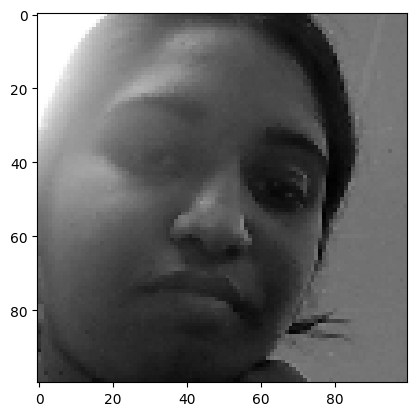

In [12]:
a=df[df['label']==8]
b=a.iloc[12:13,:-1]
image = np.array(b, dtype=np.uint8).reshape((100, 100))
    
plt.imshow(image, cmap='gray')  # Assuming grayscale images

plt.show()

In [13]:
df.columns

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
          9991,    9992,    9993,    9994,    9995,    9996,    9997,    9998,
          9999, 'label'],
      dtype='object', length=10001)

In [14]:
y = df.pop('label')
y

0        0
1        0
2        0
3        0
4        0
        ..
8247    18
8248    18
8249    18
8250    18
8251    18
Name: label, Length: 8252, dtype: int32

In [15]:
X=df

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [17]:
X_train.shape

(5776, 10000)

In [18]:
y_test.shape

(2476,)

In [19]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
std= StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

In [20]:
model = Sequential()
model.add(InputLayer(input_shape=(10000,)))
model.add(Flatten()) 
model.add(Dense(60,activation="relu",use_bias=True))
model.add(Dense(40,activation="relu",use_bias=True))
model.add(Dense(30,activation="relu",use_bias=True))
model.add(Dense(20,activation="relu",use_bias=True))
model.add(Dropout(rate=0.2)) 
model.add(Dense(26,activation="softmax",use_bias=True))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 60)                600060    
                                                                 
 dense_1 (Dense)             (None, 40)                2440      
                                                                 
 dense_2 (Dense)             (None, 30)                1230      
                                                                 
 dense_3 (Dense)             (None, 20)                620       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 26)                

In [21]:
sgd=keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.03)
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
history=model.fit(X_train,y_train,epochs=20,batch_size=100,validation_split=0.3,shuffle=True,validation_freq=1)

Epoch 1/20


41/41 [==============================] - 3s 28ms/step - loss: 2.2437 - accuracy: 0.3648 - val_loss: 1.3389 - val_accuracy: 0.7276
Epoch 2/20
41/41 [==============================] - 1s 13ms/step - loss: 1.1373 - accuracy: 0.6945 - val_loss: 0.6906 - val_accuracy: 0.8419
Epoch 3/20
41/41 [==============================] - 1s 15ms/step - loss: 0.7497 - accuracy: 0.7927 - val_loss: 0.4875 - val_accuracy: 0.8932
Epoch 4/20
41/41 [==============================] - 1s 19ms/step - loss: 0.5777 - accuracy: 0.8434 - val_loss: 0.3720 - val_accuracy: 0.9198
Epoch 5/20
41/41 [==============================] - 1s 19ms/step - loss: 0.4593 - accuracy: 0.8781 - val_loss: 0.2984 - val_accuracy: 0.9319
Epoch 6/20
41/41 [==============================] - 1s 19ms/step - loss: 0.3885 - accuracy: 0.8946 - val_loss: 0.2385 - val_accuracy: 0.9388
Epoch 7/20
41/41 [==============================] - 1s 16ms/step - loss: 0.3171 - accuracy: 0.9149 - val_loss: 0.1986 - val_accuracy: 0.9486
Epoch 8/20


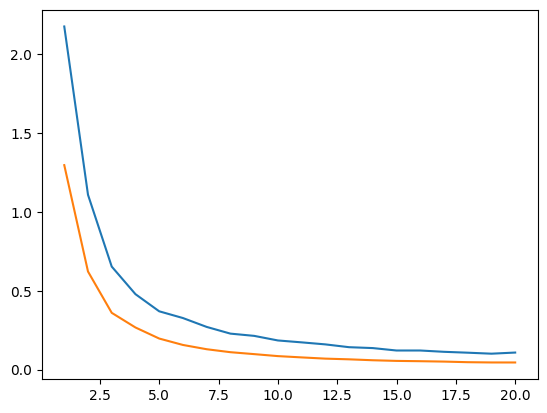

In [24]:
plt.plot(range(1,21),history.history['loss'],label='train')
plt.plot(range(1,21),history.history['val_loss'],label='test')

In [25]:
pro=model.predict(X_test)
pro

78/78 [==============================] - 0s 3ms/step


array([[1.8857603e-08, 2.7595704e-10, 8.5480629e-08, ..., 5.7005618e-08,
        1.0128887e-06, 1.0052556e-08],
       [1.7787503e-06, 5.7998682e-11, 1.1416024e-07, ..., 6.3065592e-08,
        3.2672120e-05, 8.2906454e-10],
       [4.7435827e-07, 5.7486131e-06, 2.3215676e-07, ..., 1.7010717e-06,
        6.0276143e-08, 3.8286654e-09],
       ...,
       [2.3740922e-06, 8.2023111e-11, 1.1669754e-07, ..., 7.8502595e-08,
        2.8342107e-05, 8.6602492e-10],
       [8.7449183e-07, 8.4436068e-04, 9.9819559e-01, ..., 1.7146752e-06,
        1.8343722e-05, 6.1375490e-06],
       [2.8705853e-09, 8.1363617e-11, 8.5955545e-09, ..., 1.2271745e-08,
        3.3240067e-11, 2.1485711e-09]], dtype=float32)

In [26]:
product_class = np.argmax(pro,axis=1)

In [27]:
product_class

array([12,  3, 14, ...,  3,  2, 10], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,product_class)

0.9935379644588045

In [29]:
print(confusion_matrix(y_test,product_class))

[[ 32   0   1   0   0   0   0   1   0   0   0   0   0   0   0   0   2   0
    0]
 [  0 222   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0 264   0   0   0   0   0   0   0   0   4   0   0   0   0   0   0
    0]
 [  0   0   0 233   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0  68   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0  34   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   8   0   0   0   0   0   4   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0 210   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   1   0   0   0   0   0 288   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0  44   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0 209   1   0   0   0   0   0   0
    0]
 [  0   0   1   0   0   0   0   0   0   0   0  49   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   

In [30]:
model.get_metrics_result()

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.04520383>,
 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.9907675>}

In [2]:
import cv2
vid = cv2.VideoCapture(0)
from keras.models import load_model

# Load the saved model
#loaded_model = load_model('ANN_Attendance.keras')
face_detect = cv2.CascadeClassifier(r'C:\Users\Hello\Downloads\haarcascade_frontalface_alt.xml')
while True :
    succ , img = vid.read()
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    array = face_detect.detectMultiScale(gray_img)
    for x,y,w,h in array:
        
        crop_img = gray_img[y-10:y+h+10,x-10:x+w+10]
        cv2.imshow("crop_img",crop_img)
    
       
        cv2.imshow("gray_img",gray_img)
        
    
        resized_img = cv2.resize(crop_img,(100,100))
        data = np.asarray(resized_img)
        data = data.reshape(1,10000)

    
        x=pd.DataFrame(data)
        x_test=std.transform(x)
        a=loaded_model.predict(x_test)
        label=np.argmax(a)
        value_to_find = label
    
    # Iterate through the dictionary to find the key corresponding to the value
        found_key = None
        for key, val in dicton.items():
            if val == value_to_find:
                found_key = key.split('.npy')[0]
    
        text = str(found_key)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, text, (50, 50), font, 1, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.imshow("gray_img_text",img)


    if cv2.waitKey(1) & 255==ord("q"):
        break
cv2.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
